In [181]:
import pandas as pd
import pandahouse as ph 
from scipy import stats
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode


%matplotlib inline

## Проект: вариант 2
## Задание 1. A/B–тестирование
#### **1.1 Условие**

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

#### **1.2 Входные данные**

В качестве входных данных Вы имеете 4 csv-файла:

+ groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
+ groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
+ active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
+ checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

#### **1.3 Вопросы**

Предлагаем Вам ответить на следующие вопросы:

+ На какие метрики Вы смотрите в ходе анализа и почему?
+ Имеются ли различия в показателях и с чем они могут быть связаны?
+ Являются ли эти различия статистически значимыми?
+ Стоит ли запускать новую механику на всех пользователей?
+ Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

#### **1.4 Требования к ответу**

+ При выполнении тестового задания необходимо использовать язык программирования Python. 
+ В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
+ Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

In [435]:
# Парсим groups
public_key = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
groups = pd.read_csv(download_url, sep=';')

In [436]:
# Парсим group_add
public_key = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
group_add = pd.read_csv(download_url, sep=',')

In [437]:
# Парсим active_studs
public_key = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
active_studs = pd.read_csv(download_url, sep=';')

In [438]:
# Парсим checks
public_key = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
checks = pd.read_csv(download_url, sep=';')

#### Предварительный анализ и подготовка данных

Посмотрим на размеры данных, пропущенные значения, дубликаты и ошибки.


In [439]:
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [440]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [441]:
groups.isna().sum()

id     0
grp    0
dtype: int64

In [442]:
groups.id.duplicated().sum()

0

In [443]:
group_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [444]:
group_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [445]:
group_add.isna().sum()

id     0
grp    0
dtype: int64

In [446]:
group_add.id.duplicated().sum()

0

In [447]:
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [448]:
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [449]:
active_studs.isna().sum()

student_id    0
dtype: int64

In [450]:
active_studs.student_id.duplicated().sum()

0

In [451]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [452]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [453]:
checks.isna().sum()

student_id    0
rev           0
dtype: int64

In [454]:
checks.student_id.duplicated().sum()

0

Пропущенные значений и дубликатов в датафреймах нет, можем работать с данными. Для начала соеденим все в один датафрейм.

In [455]:
# соединяем основной файл с группами пользователей с дополнительным
upd_groups = pd.concat([groups, group_add])

In [456]:
# проверяем на дубликаты
upd_groups.id.duplicated().sum()

0

In [457]:
# изменяем название колонки для успешного мерджа
active_studs = active_studs.rename(columns={'student_id': 'id'})

In [458]:
# добавляем новую колонку с значением 1 для разметки активных пользователей в общем датафрейме
active_studs['active'] = 1

In [459]:
# мерджим всех пользователей с активными
full_df = upd_groups.merge(active_studs, how='left', on='id')

In [460]:
full_df.head()

,id,grp,active
0,1489,B,NaN
1,1627,A,1.0
2,1768,B,NaN
3,1783,B,NaN
4,1794,A,NaN


In [461]:
# изменяем название колонки для успешного мерджа
checks = checks.rename(columns={'student_id': 'id'})

In [462]:
# добавляем новую колонку с значением 1 для разметки активных пользователей в общем датафрейме
checks['purchase'] = 1

In [463]:
# добавляем к основному фрейму чеки
full_df = full_df.merge(checks, how='left', on='id')

In [464]:
# смотрим, встречается ли у нас в чеках сумма 0
full_df.loc[full_df.rev == 0]

,id,grp,active,rev,purchase


In [465]:
# заменяем пустые значения на нули
full_df = full_df.fillna(0)

In [466]:
full_df.head()

,id,grp,active,rev,purchase
0,1489,B,0.0,0.0,0.0
1,1627,A,1.0,990.0,1.0
2,1768,B,0.0,0.0,0.0
3,1783,B,0.0,0.0,0.0
4,1794,A,0.0,0.0,0.0


In [467]:
# меняем типы данных в колонках с разметкой на целочисленный
full_df[['active', 'purchase']] = full_df[['active', 'purchase']].astype(int)

Проверим, не получилось так, что покупка была, а активность нет

In [468]:
full_df.loc[(full_df.active == 0) & (full_df.purchase == 1)]

,id,grp,active,rev,purchase
39,3185,B,0,690.0,1
121,25973,B,0,690.0,1
125,26280,B,0,690.0,1
223,100645,B,0,630.0,1
254,102534,B,0,580.0,1
...,...,...,...,...,...
72452,5291900,B,0,199.0,1
72753,5331842,B,0,290.0,1
73632,5486319,B,0,199.0,1
74049,5562806,B,0,398.0,1


149 пользователей не были активны, но при этом сделали покупки. Здесь несколько вариантов - ошибка или автооплата. В любом случае на статистику это повлияет, у нас других условий нет, поэтому убираем подобные случае из датафрейма.

In [476]:
# оставляем только активных пользователей, чтобы убрать историю "активности нет - оплата есть"
metrics = full_df.query('active == 1').groupby(['grp']).agg({'active': 'sum', 'purchase': 'sum', 'rev': 'sum'})

In [477]:
metrics.rev = metrics.rev.round(2)

In [484]:
metrics

,active,purchase,rev,CR,ARPU
grp,,,,,
A,1538,78,72820.0,5.07,47.347204
B,6803,314,394974.0,4.62,58.058798


#### Выбираем метрики

Так как в нашей задаче выкатили новую систему оплаты, то считаю, что наши метрики должны быть связаны с денежными показателями:

1. Конверсия в покупку - процент пользователей, совершивших оплату. Это одна из ключевых метрик, которая позволяет оценить эффективность новой механики оплаты.

2. ARPU - средний доход пользователя. Это поможет понять, как новая механика оплаты влияет доход с каждого пользователя.

3. Средний чек - средний размер оплаты за пользователя в каждой группе. Это может помочь понять, как новая механика оплаты влияет на суммарный доход.



#### Конверсия в покупку (CR)

Будем считать по следющей формуле = купившие пользователи / активные пользователи * 100.


In [480]:
# считаем CR
metrics['CR'] = ((metrics.purchase/metrics.active).mul(100)).round(2)

In [481]:
metrics

,active,purchase,rev,CR
grp,,,,
A,1538,78,72820.0,5.07
B,6803,314,394974.0,4.62


В целевой группе(B) конверсия ниже примерно на 0.5% относительно контрольной(A).

#### ARPU

Будем считать по следющей формуле = доход с активных пользователей / активные пользователи


In [485]:
# Считаем ARPU
metrics['ARPU'] = (metrics.rev/metrics.active).round(2)

In [486]:
metrics

,active,purchase,rev,CR,ARPU
grp,,,,,
A,1538,78,72820.0,5.07,47.35
B,6803,314,394974.0,4.62,58.06


В целевой группе(B) ARPU выше примерно на 11 д.е. относительно контрольной(A).

#### Средний чек

Будем считать по следющей формуле = доход / купившие пользователи


In [487]:
# Считаем средний чек
metrics['avg_check'] = (metrics.rev/metrics.purchase).round(2)

In [488]:
metrics

,active,purchase,rev,CR,ARPU,avg_check
grp,,,,,,
A,1538,78,72820.0,5.07,47.35,933.59
B,6803,314,394974.0,4.62,58.06,1257.88


В целевой группе(B) ARPU выше примерно на 324 д.е. относительно контрольной(A).

**По итогу** - конверсия в выше в контрольной группе, а ARPU и средний чек выше в экспериментальной группе. На первый вгляд нельзя утверждать об явном преимуществе новой системы оплаты, необходимо провести статистический анализ.

#### Конверсия - статистический анализ

Данные о конверсиях категориальные, поэтому используем Хи-квадрат тест независимости

**Наши гипотезы**

- Н0 конверсия и группа независимы
- Н1 конверсия и группа зависимы

In [489]:
# проверяем размеры групп
full_df.groupby('grp').id.count()

grp
A    14693
B    59883
Name: id, dtype: int64

In [490]:
full_df.head()

,id,grp,active,rev,purchase
0,1489,B,0,0.0,0
1,1627,A,1,990.0,1
2,1768,B,0,0.0,0
3,1783,B,0,0.0,0
4,1794,A,0,0.0,0


In [491]:
# Создаем сводную таблицу
crosstab_cr = pd.crosstab(full_df.query('active == 1').grp, full_df.query('active == 1').purchase)

In [492]:
crosstab_cr

purchase,0,1
grp,,
A,1460,78
B,6489,314


In [493]:
stat, p, dof, expected = stats.chi2_contingency(crosstab_cr)

In [494]:
stat, p

(0.48480826522557896, 0.48625240457231045)

In [495]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

НЕ отклоняем нулевую гипотезу


Поскольку p-значение нашего теста значительно выше, чем альфа = 0,05, мы не можем отвергнуть нулевую гипотезу. То есть с большей вероятностью конверсия не зависит от группы.

#### ARPU - статистический анализ

Если данные распределены нормально и гомогенны , то можем попробовать использовать T-критерий Стьюдента.

**Наши гипотезы**

- Н0 ARPU в тестовой и контрольной группах равны
- Н1 ARPU в тестовой и контрольной группах не равны

In [373]:
full_df.head()

,id,grp,active,rev,purchase
0,1489,B,0,0.0,0
1,1627,A,1,990.0,1
2,1768,B,0,0.0,0
3,1783,B,0,0.0,0
4,1794,A,0,0.0,0


In [374]:
arpu_grp_a = full_df.query('active == 1 and grp == "A"')[['grp', 'rev']]
arpu_grp_b = full_df.query('active == 1 and grp == "B"')[['grp', 'rev']]

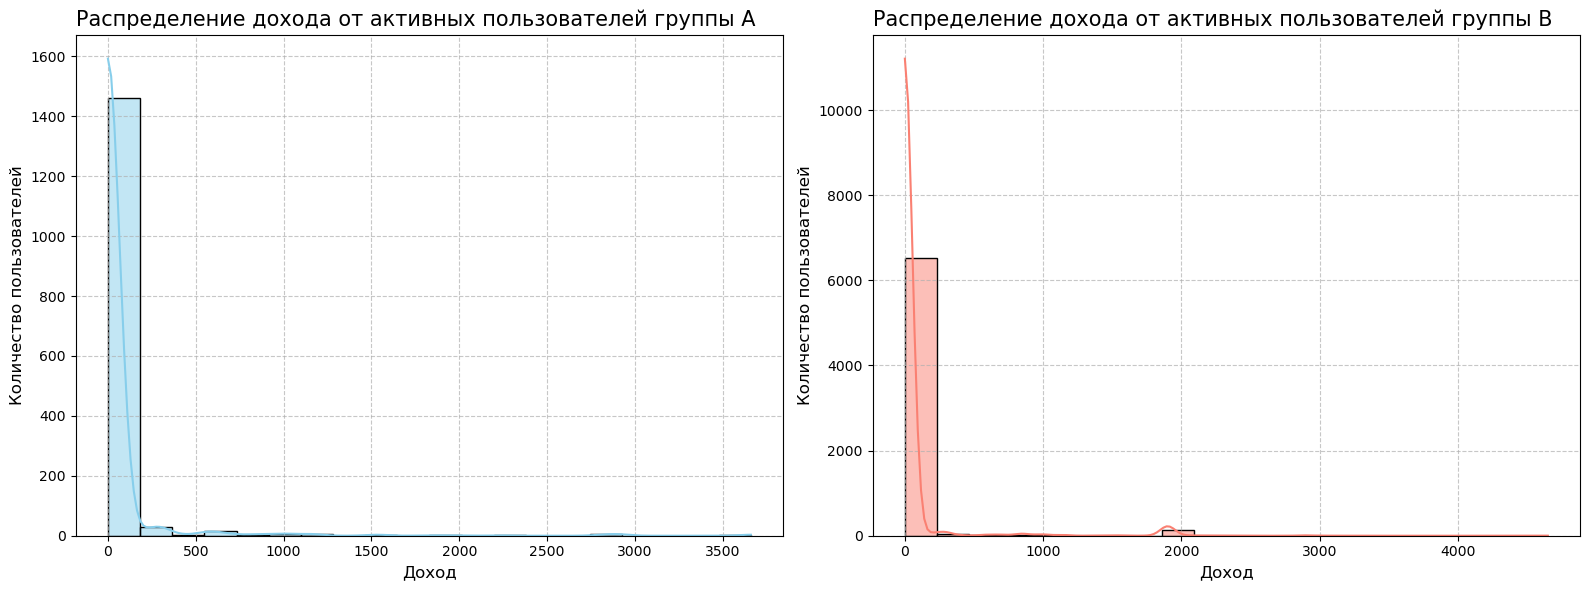

In [375]:
# Создаем холст с двумя подграфиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Первый график
sns.histplot(data=arpu_grp_a, x="rev", kde=True, color='skyblue', bins=20, ax=axes[0])
axes[0].set_xlabel('Доход', fontsize=12)
axes[0].set_ylabel('Количество пользователей', fontsize=12)
axes[0].set_title('Распределение дохода от активных пользователей группы А', fontsize=15, loc='left')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Второй график
sns.histplot(data=arpu_grp_b, x="rev", kde=True, color='salmon', bins=20, ax=axes[1])
axes[1].set_xlabel('Доход', fontsize=12)
axes[1].set_ylabel('Количество пользователей', fontsize=12)
axes[1].set_title('Распределение дохода от активных пользователей группы B', fontsize=15, loc='left')
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Проведем тесты на нормальность и гомогенность. 

In [376]:
# Тест Шапиро-Уилка для контрольной группы
statistic, p_value = stats.shapiro(arpu_grp_a.rev)

In [377]:
alpha = 0.05
if p_value > alpha:
    print("Данные выглядят нормально (не отвергаем нулевую гипотезу)")
else:
    print("Данные не выглядят нормально (отвергаем нулевую гипотезу)")

Данные не выглядят нормально (отвергаем нулевую гипотезу)


In [378]:
# Тест Шапиро-Уилка для целевой группы
statistic, p_value = stats.shapiro(arpu_grp_b.rev)

/Users/vboitcev/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [379]:
alpha = 0.05
if p_value > alpha:
    print("Данные выглядят нормально (не отвергаем нулевую гипотезу)")
else:
    print("Данные не выглядят нормально (отвергаем нулевую гипотезу)")

Данные не выглядят нормально (отвергаем нулевую гипотезу)


In [380]:
# Расрпеделение не являются нормальными, поэтому для анализа гомогенности дисперсий используем тест Левене
stats.levene(arpu_grp_a.rev, arpu_grp_b.rev)

LeveneResult(statistic=1.501460829433639, pvalue=0.22048133327049665)

Дисперсии гомогенны, но распределения ненормальны. Так как выборки большие, то нормальность для нас не особо критична и мы можем полагаться на результаты T-критерий Стюдента.

In [383]:
# используем Т-тест
statistic, p_value = stats.ttest_ind(arpu_grp_a.rev, arpu_grp_b.rev)

In [384]:
alpha = 0.05
if p_value > alpha:
    print("Нет статистически значимых различий (не отвергаем нулевую гипотезу)")
else:
    print("Есть статистически значимые различия (отвергаем нулевую гипотезу)")

Нет статистически значимых различий (не отвергаем нулевую гипотезу)


Pvalue > 0.05, нет статистически значимых различий между ARPU в тестовой и контрольной группах. То есть ARPU в целевой группе не вырос статистически значимо.

#### Средний чек - статистический анализ

Если данные распределены нормально и гомогенны , то можем попробовать использовать T-критерий Стьюдента.

**Наши гипотезы**

- Н0 Средний чек в тестовой и контрольной группах равны
- Н1 Средний чек в тестовой и контрольной группах не равны

In [385]:
full_df.head()

,id,grp,active,rev,purchase
0,1489,B,0,0.0,0
1,1627,A,1,990.0,1
2,1768,B,0,0.0,0
3,1783,B,0,0.0,0
4,1794,A,0,0.0,0


In [386]:
aov_grp_a = full_df.query('active == 1 and purchase == 1 and grp == "A"')[['grp', 'rev']]
aov_grp_b = full_df.query('active == 1 and purchase == 1 and grp == "B"')[['grp', 'rev']]

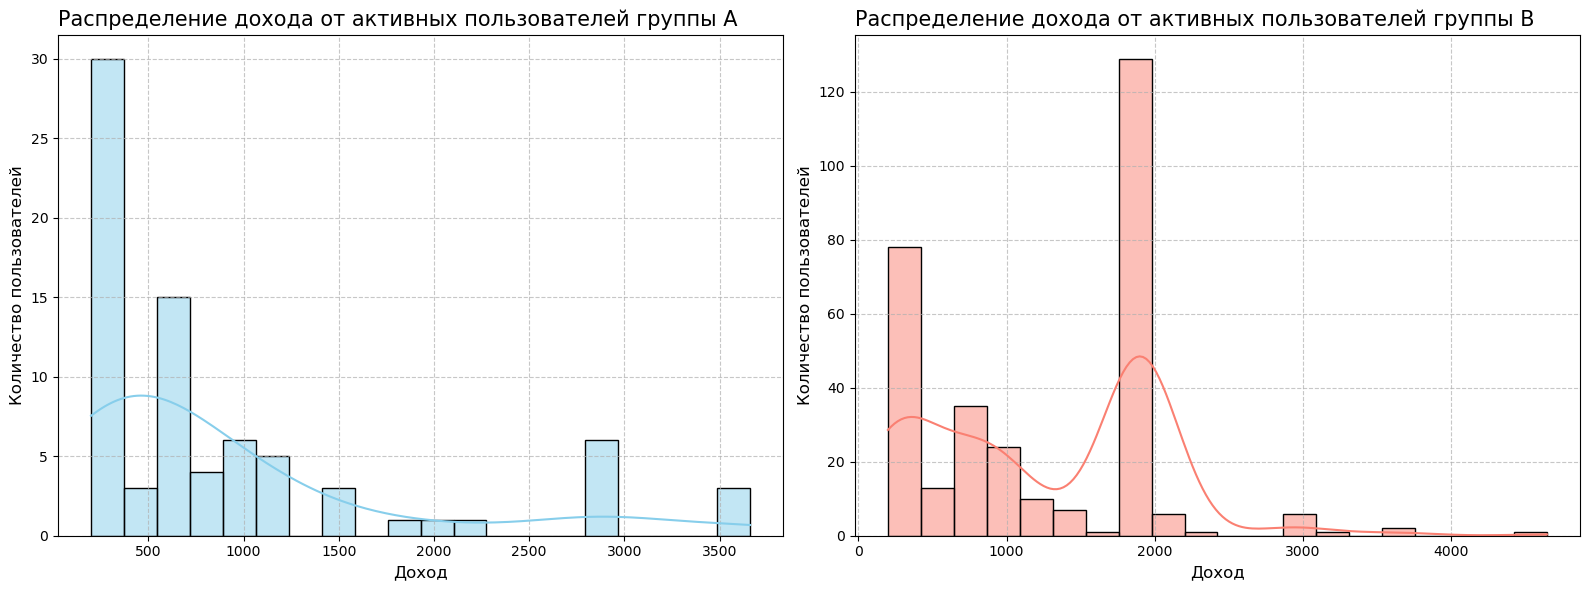

In [387]:
# Создаем холст с двумя подграфиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Первый график
sns.histplot(data=aov_grp_a, x="rev", kde=True, color='skyblue', bins=20, ax=axes[0])
axes[0].set_xlabel('Доход', fontsize=12)
axes[0].set_ylabel('Количество пользователей', fontsize=12)
axes[0].set_title('Распределение дохода от активных пользователей группы А', fontsize=15, loc='left')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Второй график
sns.histplot(data=aov_grp_b, x="rev", kde=True, color='salmon', bins=20, ax=axes[1])
axes[1].set_xlabel('Доход', fontsize=12)
axes[1].set_ylabel('Количество пользователей', fontsize=12)
axes[1].set_title('Распределение дохода от активных пользователей группы B', fontsize=15, loc='left')
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [388]:
# Тест Шапиро-Уилка для контрольной группы
statistic, p_value = stats.shapiro(aov_grp_a.rev)

In [389]:
alpha = 0.05
if p_value > alpha:
    print("Данные выглядят нормально (не отвергаем нулевую гипотезу)")
else:
    print("Данные не выглядят нормально (отвергаем нулевую гипотезу)")

Данные не выглядят нормально (отвергаем нулевую гипотезу)


In [390]:
# Тест Шапиро-Уилка для целевой группы
statistic, p_value = stats.shapiro(aov_grp_b.rev)

In [391]:
alpha = 0.05
if p_value > alpha:
    print("Данные выглядят нормально (не отвергаем нулевую гипотезу)")
else:
    print("Данные не выглядят нормально (отвергаем нулевую гипотезу)")

Данные не выглядят нормально (отвергаем нулевую гипотезу)


In [392]:
# Расрпеделение не являются нормальными, поэтому для анализа гомогенности дисперсий используем тест Левене
stats.levene(aov_grp_a.rev, aov_grp_b.rev)

LeveneResult(statistic=3.075681699981606, pvalue=0.08025675761347022)

Результаты тестов подобны ARPU - дисперсии гомогенны, но распределения ненормальны. Так как выборки большие, то нормальность для нас не особо критична и мы можем полагаться на результаты T-критерий Стюдента.

In [393]:
# испольхуем Т-тест
statistic, p_value = stats.ttest_ind(aov_grp_a.rev, aov_grp_b.rev)

In [394]:
alpha = 0.05
if p_value > alpha:
    print("Нет статистически значимых различий (не отвергаем нулевую гипотезу)")
else:
    print("Есть статистически значимые различия (отвергаем нулевую гипотезу)")

Есть статистически значимые различия (отвергаем нулевую гипотезу)


Т-тест утверждает, что средний чек между группами статистически значимо различается.

#### Вывод


**Результаты тестов  и сравнений:**

+ Конверсия в покупку выше в контрольной группе на примерно на 0.5%, при этом критерий независимости Хи-квадрат показал, что изменения не являются статистически значимыми.
+ ARPU выше в целевой группе на 11 д.е., при этом T-тест Стьюдента указал на отсутствие статистической значимости в данной разности.
+ Средний чек в целевой группе выше на 324 д.е., тест Т-стьюдента потвердил статистически значимые различия в данных.


In [395]:
metrics

,active,purchase,rev,CR,ARPU,avg_check
grp,,,,,,
A,1538,78,72820.0000,5.071521,47.347204,933.589744
B,6803,314,394974.0035,4.615611,58.058798,1257.878992


По результатам мы видим, что различия между контрольной и экспериментальной группами не всегда являются статистически значимыми. Это означает, что наблюдаемые различия могут быть случайными и не связаны с внедрением новой механики оплаты.

Результаты анализы не совсем однозначны. Конверсия в покупку не выросла, ARPU не показал статистически значимого увеличения, однако средний чек увеличился.

Я бы предложил распространить обновление на всех пользователей, при условии учета и других факторов, таких как затраты на внедрение новой механики оплаты и ее потенциальное влияние на пользовательский опыт. Если затраты на внедрение невысоки и мы уверены, что это негативно не повлияет на пользователей, то можно рассмотреть вариант внедрения обновления на всех пользователей. Повышение среднего чека благоприятно скажется на доходах компании. Однако, если затраты высоки или есть определенные сомнения в пользе обновления, я бы рекомендовал воздержаться от внедрения или провести более глубокий анализ, используя другие метрики.

Помимо этого, я бы проконсультировался с коллегами, учитывая возможные вопросы не только по результатам анализа, но и по качеству данных, особенно учитывая наличие покупок без предшествующей активности пользователей. 

## Задание 2. SQL
##### **2.1 Очень усердные ученики.**
##### **2.1.1 Условие**

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

##### **2.1.2 Задача**

Дана таблица default.peas:

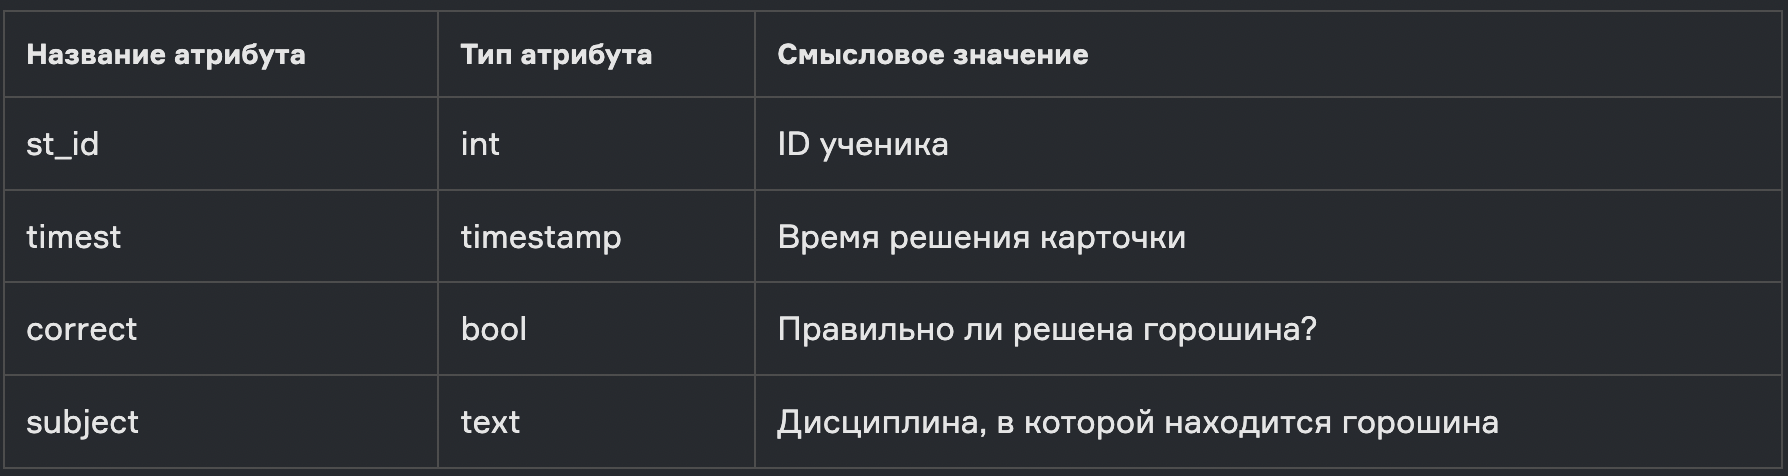


Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.



In [3]:
 connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

Посмотрим на данные и наличие дубликатов.

In [7]:
query = """
select *
from default.peas
limit 5
"""
peas = ph.read_clickhouse(query, connection=connection)
peas

KeyError: 'DateTime64(3)'

Видимо Pandas ругается из-за формата времени, попробуем привести дату к необходимому формату

In [11]:
query = """
SELECT
   st_id,
   correct,
   subject,
   timest::datetime
FROM default.peas
LIMIT 5
"""
peas = ph.read_clickhouse(query, connection=connection)
peas

,st_id,correct,subject,"CAST(timest, \'datetime\')"
0,100379,1,Theory of probability,2021-10-30 13:32:29
1,100379,0,Vizualization,2021-10-30 14:11:19
2,100379,1,Theory of probability,2021-10-30 15:54:22
3,100379,1,Vizualization,2021-10-30 16:44:50
4,100379,1,Theory of probability,2021-10-30 17:15:05


Работает. 
В задаче сказано "хотя бы раз за текущий месяц" - необходимо посмотреть, сколько у нас таких месяцев.
Также будем считать, что больше 20 горошин тоже идет в зачет (если столько вообще есть).

In [14]:
query = """
SELECT
   min(timest::date),
   max(timest::date)
FROM default.peas
"""
peas = ph.read_clickhouse(query, connection=connection)
peas

,"min(CAST(timest, \'date\'))","max(CAST(timest, \'date\'))"
0,2021-10-30,2021-10-31


У нас в таблице данные только по двум дням одного месяца и года.

In [26]:
query = """
SELECT
    count(DISTINCT st_id) as diligent_students
FROM (
    SELECT
        st_id,
        sum(correct) as corrects_count
    FROM default.peas
    group by
        st_id) t
WHERE corrects_count >= 20
"""
peas = ph.read_clickhouse(query, connection=connection)
peas

,diligent_students
0,136


##### **2.2 Оптимизация воронки**
##### **2.2.1 Условие**

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

##### **2.1.2 Задача**

Дана таблицы: default.peas (см. выше), default.studs:

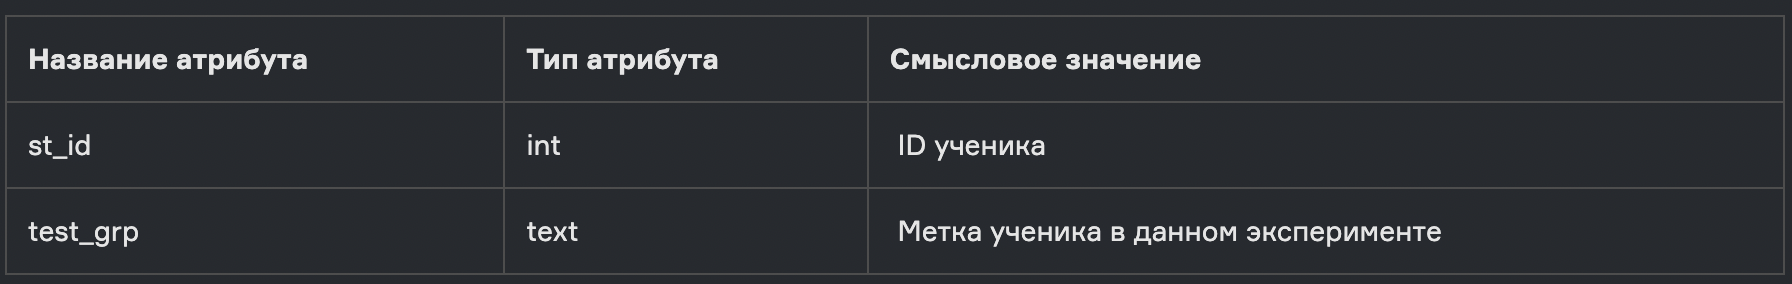

и default.final_project_check:

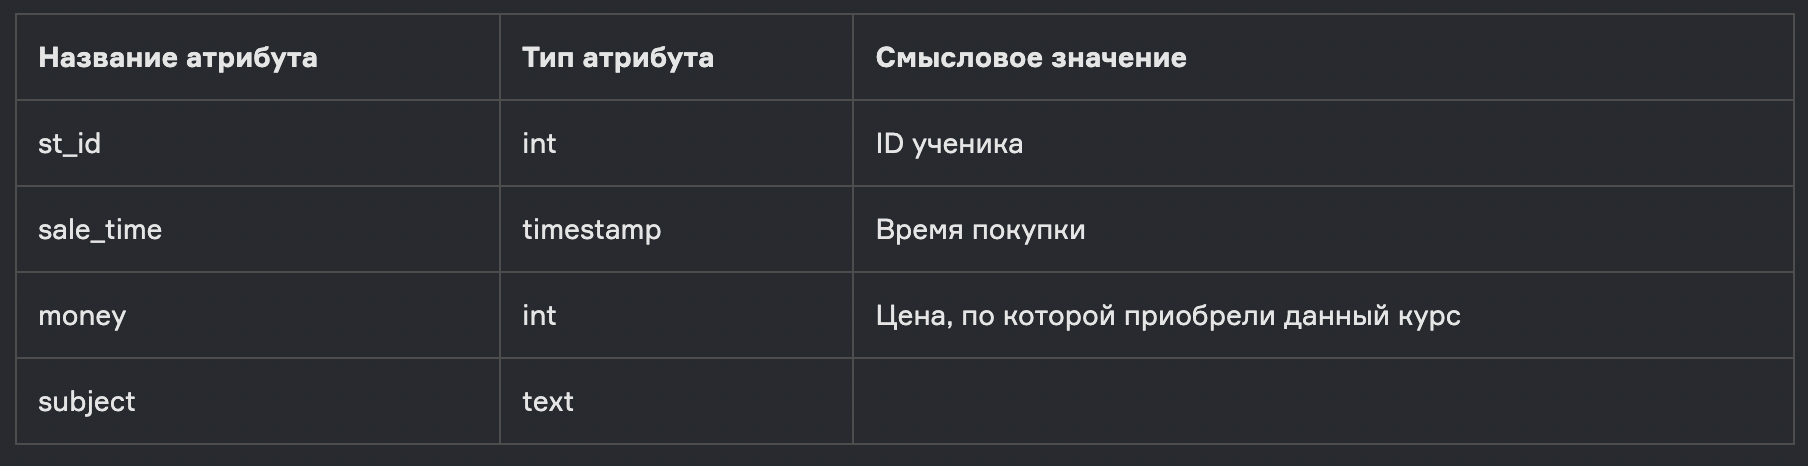

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

ARPU 
ARPAU 
CR в покупку 
СR активного пользователя в покупку 
CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.




Studs у нас основная таблица - там распределены тестовые группы. Будем джойнить к ней две другие таблицы. Но для начала сделаем проверку на дубликаты.

In [27]:
query = """
SELECT
   count(*)
FROM default.studs
"""
studs = ph.read_clickhouse(query, connection=connection)
studs

,count()
0,600


In [28]:
query = """
SELECT
   count(DISTINCT *)
FROM default.studs
"""
studs = ph.read_clickhouse(query, connection=connection)
studs

,"uniqExact(st_id, test_grp)"
0,600


Дубликатов нет, можем писать запрос.

In [31]:
query = """
SELECT
    a.test_grp,
    round(sum(money) / count(a.st_id), 2) as ARPU,
    round(sumIf(money, decided > 10) / countIf(a.st_id, decided > 10), 2) as ARPAU,
    round(countIf(a.st_id, money > 0) / count(a.st_id) * 100, 2) as CR,
    round(countIf(a.st_id, money > 0 and decided > 10) / countIf(a.st_id, decided > 10) * 100, 2) as CRAU,
    round(countIf(a.st_id, pay_math > 0 and decided_math >= 2) / countIf(a.st_id, decided_math >= 2) * 100, 2) as CRAU_math
FROM default.studs as a
    LEFT JOIN 
        (SELECT 
            st_id,
            sum(correct) as decided,
            sumIf(correct, subject = 'Math') as decided_math
        FROM default.peas
        GROUP BY
            st_id) as b on a.st_id = b.st_id
    LEFT JOIN 
        (SELECT 
            st_id,
            sum(money) as money,
            countIf(st_id, subject = 'Math') as pay_math
        FROM default.final_project_check
        GROUP BY
            st_id) as c on a.st_id = c.st_id
GROUP BY 
    a.test_grp
"""
table = ph.read_clickhouse(query, connection=connection)
table

,a.test_grp,ARPU,ARPAU,CR,CRAU,CRAU_math
0,control,4540.98,10393.70,4.92,11.02,6.12
1,pilot,11508.47,29739.58,10.85,26.04,9.52


## Задание 3. Python
##### **3.1 Задача**

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [405]:
# Парсим groups
public_key = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
groups = pd.read_csv(download_url, sep=';')

In [406]:
# Парсим active_studs
public_key = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
active_studs = pd.read_csv(download_url, sep=';')
active_studs = active_studs.rename(columns={'student_id':'id'}) 

In [407]:
# Парсим checks
public_key = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
checks = pd.read_csv(download_url, sep=';')
checks = checks.rename(columns={'student_id':'id'}) 

In [408]:
# Парсим group_add
public_key = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
group_add = pd.read_csv(download_url, sep=',')

In [416]:
# функция для обновления метрик
def update_metrics (groups, active_studs, checks, group_add): 
   # соединяем основной файл с группами пользователей с дополнительным
   upd_groups = pd.concat([groups, group_add])

   # добавляем новую колонку с значением 1 для разметки активных пользователей в общем датафрейме
   active_studs['active'] = 1

   # мерджим активных пользователей с группами
   full_df = upd_groups.merge(active_studs, how='left', on='id')

   # добавляем новую колонку с значением 1 для разметки активных пользователей в общем датафрейме
   checks['purchase'] = 1

   # мерджим оплаты к основной таблице
   full_df = full_df.merge(checks, how='left', on='id')

   # заменяем пустые значения на нули
   full_df = full_df.fillna(0)

   # меняем типы данных в колонках с разметкой на целочисленный
   full_df[['active', 'purchase']] = full_df[['active', 'purchase']].astype(int)
   
   # оставляем только активных пользователей, чтобы убрать историю "активности нет - оплата есть"
   metrics = full_df.query('active == 1').groupby(['grp']).agg({'active': 'sum', 'purchase': 'sum', 'rev': 'sum'})

   # собираем метрики
   metrics['CR'] = ((metrics.purchase/metrics.active).mul(100)).round(2)
   metrics['ARPU'] = (metrics.rev/metrics.active).round(2)
   metrics['avg_check'] = (metrics.rev/metrics.purchase).round(2)
   metrics.rev =metrics.rev.round(2)
   
   return metrics

In [417]:
metrics = update_metrics (groups, active_studs, checks, group_add)

In [418]:
metrics

,active,purchase,rev,CR,ARPU,avg_check
grp,,,,,,
A,1538,78,72820.0,5.07,47.35,933.59
B,6803,314,394974.0,4.62,58.06,1257.88


In [328]:
def plot_metrics(metrics):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10)) #создаем полотно для графиков
    axes = axes.flatten() #преобразуем в одномерный массив
    colors = plt.cm.tab10.colors  # забираем цвета для групп

    #перебираем метрики и группы
    for i, column in enumerate(metrics.columns): 
        for j, group in enumerate(metrics.index):
            #рисуем гистограммы для каждой метрики
            axes[i].bar(j, metrics.loc[group, column], color=colors[j], label=group, edgecolor='none') 

        #оформляем
        axes[i].set_title(f'График {column}')
        axes[i].set_xlabel('Группа')
        axes[i].set_ylabel(column)
        axes[i].set_xticks(range(len(df.index)))
        axes[i].set_xticklabels(df.index)
        axes[i].grid(axis='y')
        axes[i].legend()

    #выравниваем
    plt.tight_layout()
    plt.show()

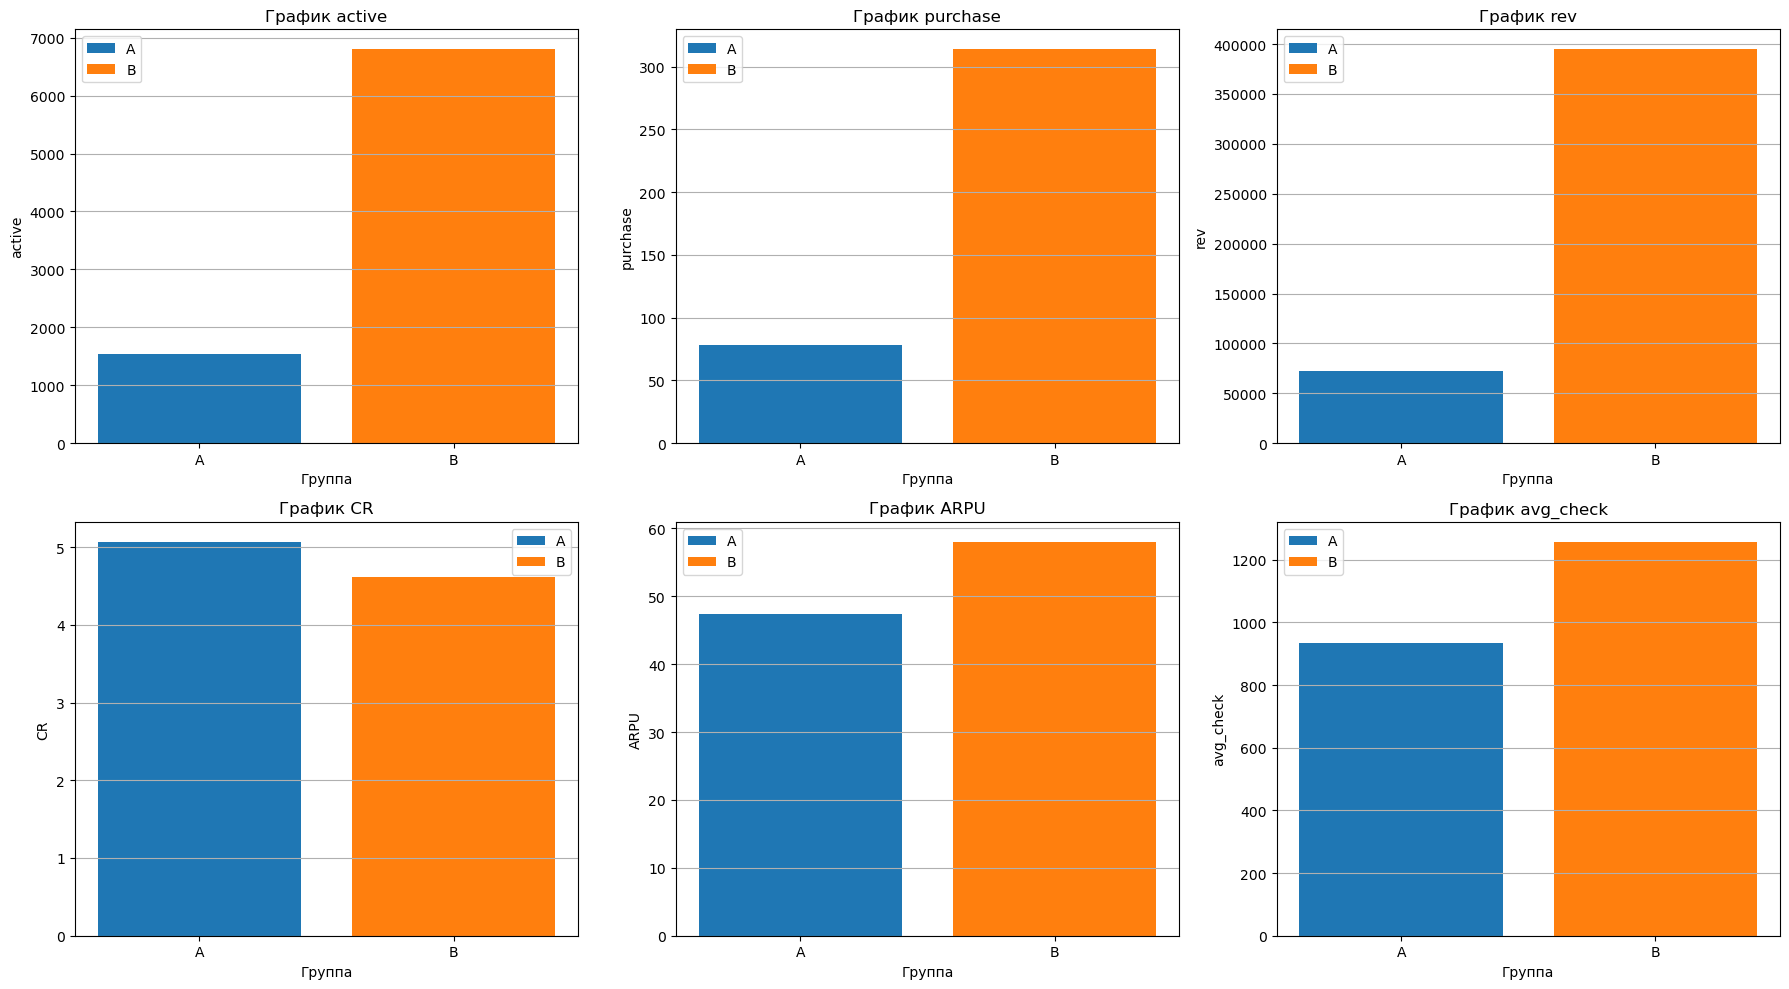

In [329]:
plot_metrics(metrics)